 #  <p style="text-align: center;">Technical Support Data Analysis

Technical support data can often be a rich source of information on opportunities for improving customer experience. The lesser the trouble customers have with the product the better. Even better when the customers are able to overcome
technical challenge quickly with minimal effort. Let us analyze the tech support data and do some basic analysis on problem types, time to resolve the problem and channel of suppor that is most suitable

## Loading the Dataset

In [62]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [63]:
import matplotlib.pylab as plt
%matplotlib inline

In [64]:
tech_supp_df = pd.read_csv("technical_support_data.csv")

In [65]:
tech_supp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
PROBLEM_TYPE             23 non-null object
no_of_cases              23 non-null int64
Avg_pending_calls        23 non-null float64
Avg_resol_time           23 non-null int64
recurrence_freq          23 non-null float64
Replace_percent          23 non-null float64
In_warranty_percent      23 non-null int64
Post_warranty_percent    23 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.5+ KB


The dataset contains one record for each unique problem type. It has metrics for each type like count, average calls to resolve, average resolution time etc.

In [66]:
tech_supp_df.head().T

,0,1,2,3,4
PROBLEM_TYPE,Temperature control not working,power chord does not tightly fit,Fan swing not working,Main switch does not on,Forgot mobile app password
no_of_cases,170,12,5,3,45
Avg_pending_calls,1.3,2,1,2,2.3
Avg_resol_time,32,150,35,8,54
recurrence_freq,0.04,0.01,0.02,0.01,0.15
Replace_percent,0,0.5,0.2,0.7,0
In_warranty_percent,75,5,90,5,99
Post_warranty_percent,25,95,10,95,1


In [67]:
tech_supp_df.columns


Index(['PROBLEM_TYPE', 'no_of_cases', 'Avg_pending_calls', 'Avg_resol_time',
       'recurrence_freq', 'Replace_percent', 'In_warranty_percent',
       'Post_warranty_percent'],
      dtype='object')

## Standardize numerical data

In [68]:
data=tech_supp_df.drop("PROBLEM_TYPE",axis=1)
data.columns=['no_of_cases', 'Avg_pending_calls', 'Avg_resol_time',
       'recurrence_freq', 'Replace_percent', 'In_warranty_percent',
       'Post_warranty_percent']

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [72]:
data=scaler.fit_transform(data)
tech_df=pd.DataFrame(data)
tech_df.columns=['no_of_cases', 'Avg_pending_calls', 'Avg_resol_time',
       'recurrence_freq', 'Replace_percent', 'In_warranty_percent',
       'Post_warranty_percent']

In [73]:
tech_df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_cases,23.0,-2.172175e-17,1.022475,-0.921508,-0.786363,-0.466630,0.453015,2.486781
Avg_pending_calls,23.0,2.051499e-17,1.022475,-1.013357,-0.857282,0.027143,0.339294,2.420294
Avg_resol_time,23.0,7.240585e-18,1.022475,-1.007238,-0.798844,-0.486253,1.137484,2.031842
recurrence_freq,23.0,4.827057e-18,1.022475,-1.101765,-0.972476,0.018738,0.837566,1.828780
Replace_percent,23.0,4.344351e-17,1.022475,-0.561463,-0.561463,-0.561463,0.168439,3.368781
In_warranty_percent,23.0,-6.757879e-17,1.022475,-1.778204,-0.409439,0.548696,0.822449,0.822449
Post_warranty_percent,23.0,9.654113e-18,1.022475,-0.822449,-0.822449,-0.548696,0.409439,1.778204


## Group Data into similar clusters

In [74]:
from sklearn.cluster import KMeans

In [75]:
km = KMeans(n_clusters=2)

In [76]:
km.fit(tech_df)
tech_df['clusteredLables']=km.predict(tech_df)

In [77]:
tech_df.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,clusteredLables
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,1
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,1
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,1
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,1
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,0


# Three Cluster analysis

In [78]:
km = KMeans(n_clusters=3)
km.fit(tech_df)
tech_df['clusteredLables']=km.predict(tech_df)

In [79]:
tech_df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_cases,23.0,-2.172175e-17,1.022475,-0.921508,-0.786363,-0.466630,0.453015,2.486781
Avg_pending_calls,23.0,2.051499e-17,1.022475,-1.013357,-0.857282,0.027143,0.339294,2.420294
Avg_resol_time,23.0,7.240585e-18,1.022475,-1.007238,-0.798844,-0.486253,1.137484,2.031842
recurrence_freq,23.0,4.827057e-18,1.022475,-1.101765,-0.972476,0.018738,0.837566,1.828780
Replace_percent,23.0,4.344351e-17,1.022475,-0.561463,-0.561463,-0.561463,0.168439,3.368781
In_warranty_percent,23.0,-6.757879e-17,1.022475,-1.778204,-0.409439,0.548696,0.822449,0.822449
Post_warranty_percent,23.0,9.654113e-18,1.022475,-0.822449,-0.822449,-0.548696,0.409439,1.778204
clusteredLables,23.0,9.130435e-01,0.848155,0.000000,0.000000,1.000000,2.000000,2.000000


In [102]:
plt.figure(figsize=(300,200))
#tech_df.boxplot(by="clusteredLables")
sns.boxplot(data=tech_df)

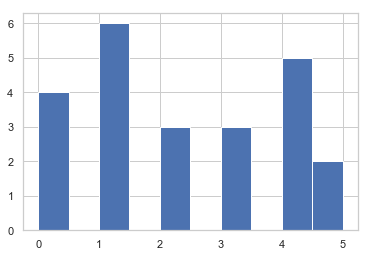

In [97]:
tech_df["clusteredLables"].hist()

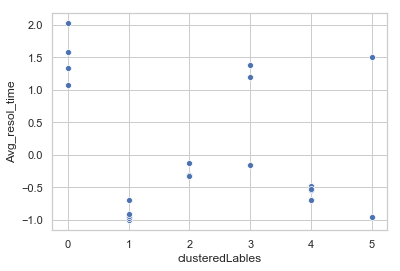

In [98]:
sns.scatterplot(x="clusteredLables",y="Avg_resol_time", data=tech_df)

## Calculate distortions for 1 to 10 clusters

In [86]:
sse_df=pd.DataFrame(columns=['K','SSE'])
for i in range(2,11):
    km= KMeans(n_clusters=i)
    km.fit(tech_df)
    tech_df['k_'+str(i)]=km.predict(tech_df)
    sse_df.loc[sse_df.shape[0]]=[i,km.inertia_]

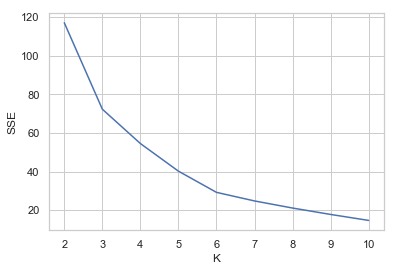

In [88]:
sns.lineplot(x="K",y="SSE", data=sse_df)

# Six cluster analysis

In [107]:
tech_df_1=pd.DataFrame(data)
tech_df_1.columns=['no_of_cases', 'Avg_pending_calls', 'Avg_resol_time',
       'recurrence_freq', 'Replace_percent', 'In_warranty_percent',
       'Post_warranty_percent']
km = KMeans(n_clusters=6)
km.fit(tech_df_1)
tech_df_1['clusteredLables']=km.predict(tech_df_1)

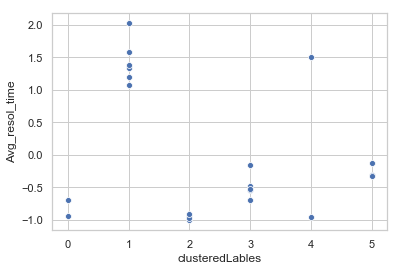

In [108]:
sns.scatterplot(x="clusteredLables",y="Avg_resol_time", data=tech_df_1)

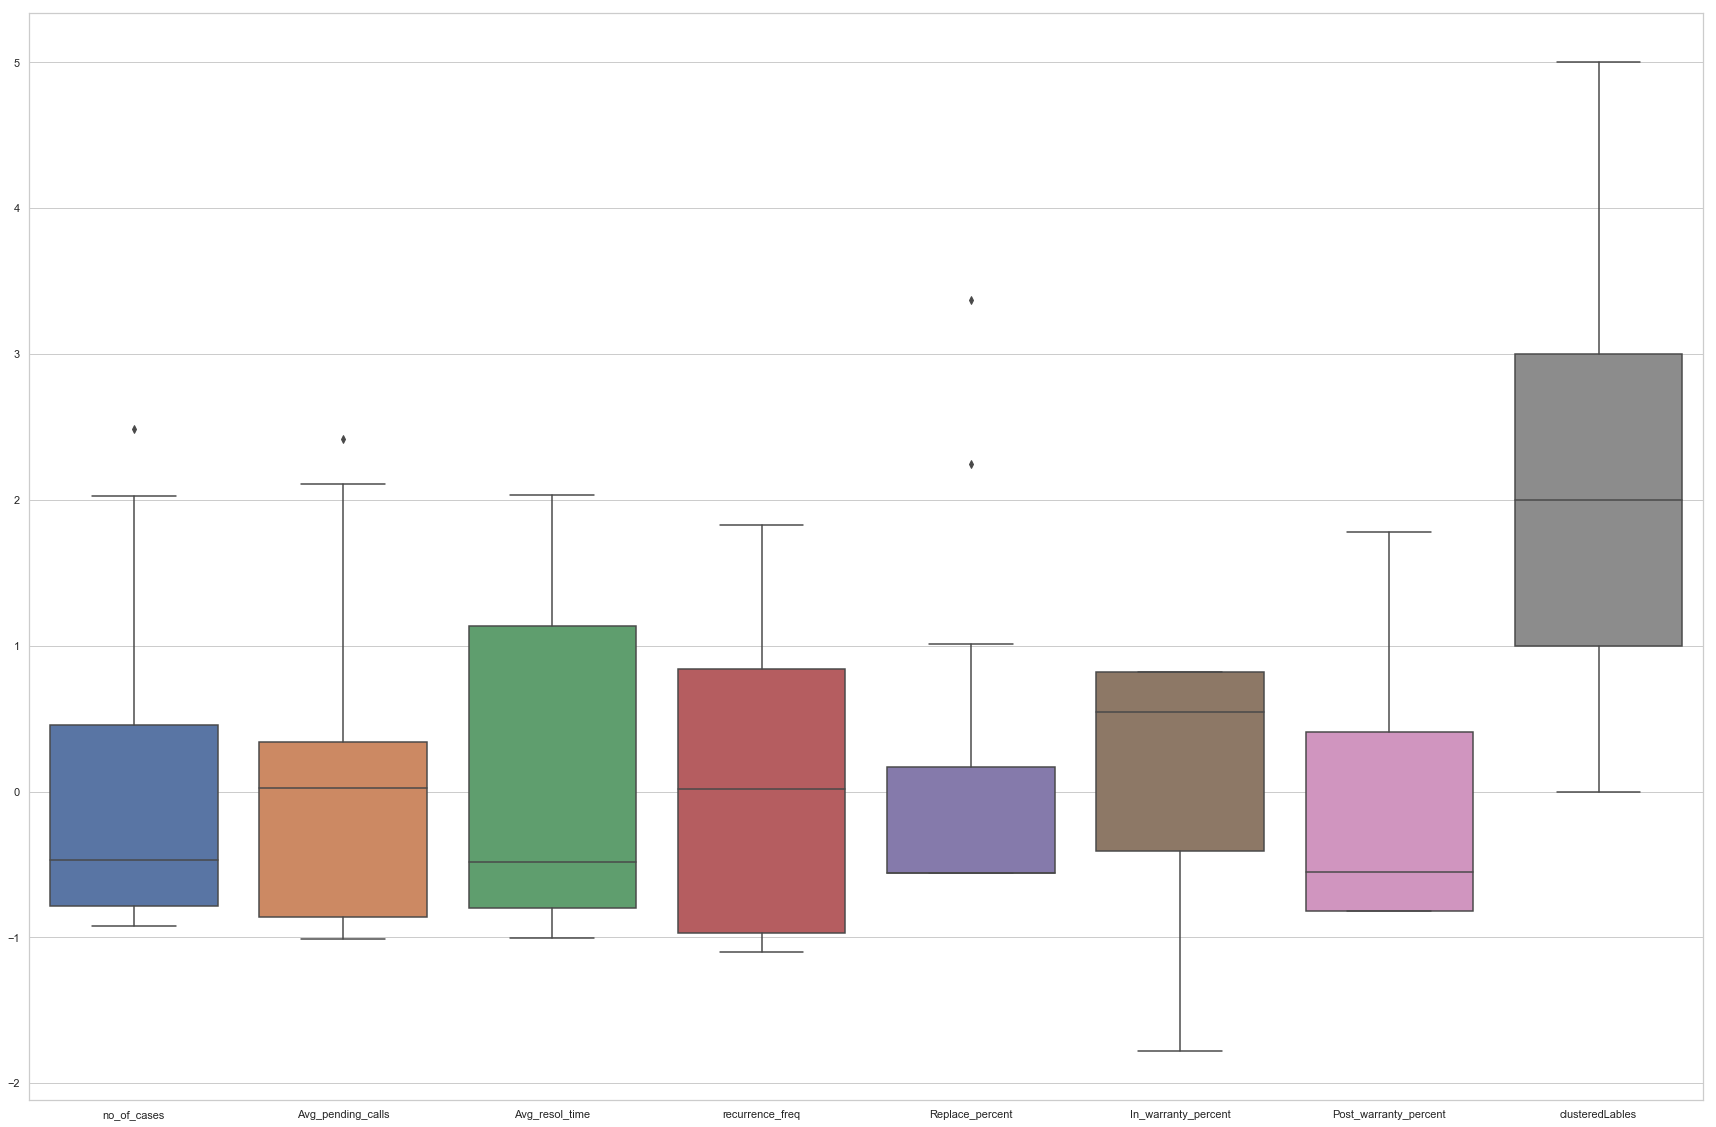

In [109]:
#tech_df.boxplot(by="clusteredLables")
plt.figure(figsize=(30,20))
sns.boxplot(data=tech_df_1)

## What would be the optimal cluster number?